In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage=requests.get('https://internshala.com/internships',headers=headers).text

In [266]:
soup=BeautifulSoup(webpage,'lxml')

In [22]:
print(soup.prettify())

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta content="IE=9" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0 user-scalable=0" name="viewport"/>
  <meta content="272234782795210" property="fb:app_id"/>
  <meta content="article" property="og:type"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="@Internshala" name="twitter:site"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="@internshala" name="twitter:creator"/>
  <meta content="https://internshala.com/static/images/internships_for_facebook.png" name="twitter:image:src"/>
  <meta content="#1295c9" name="theme-color"/>
  <meta content="#1295c9" name="msapplication-navbutton-color"/>
  <script defer="" src="https://internshala.com/static/js/includes/common/jquery-1.11.1.

In [244]:
final=pd.DataFrame()
for j in range(1,312):
    webpage=requests.get('https://internshala.com/internships/page-{}'.format(j),headers=headers).text
    soup=BeautifulSoup(webpage,'lxml')
    company=[]
    internship=[]
    location=[]
    start=[]
    duration=[]
    stipend=[]
    posted=[]
    by=[]
    kind=[]
    items=soup.find_all('div',class_='internship_meta')
#     if soup.find_all('div',class_='internship_meta').find('a', class_='link_display_like_text').text.strip()[0]==x:
#         break

    for i in items:
        try:
            company.append(i.find('a', class_='link_display_like_text').text.strip())
        except:
            company.append(np.nan)
        try:
            internship.append(i.find('h4').text.strip())
        except:
            internship.append(np.nan)
        try:
            location.append(i.find('a', class_='location_link').text)
        except:
            location.append(np.nan)
        try:
            start.append(i.find('div',{'id':'start-date-first'}).text)
        except:
            start.append(np.nan)
        try:
            duration.append(i.find('tbody').find_all('td')[1].text.strip())
        except:
            duration.append(np.nan)
        try:
            stipend.append(i.find('tbody').find_all('td')[2].text.strip())
        except:
            stipend.append(np.nan)
        try:
            posted.append(i.find('tbody').find_all('td')[3].text.strip())
        except:
            posted.append(np.nan)
        try:
            by.append(i.find('tbody').find_all('td')[4].text.strip())
        except:
            by.append(np.nan)
    #     try:
    #         kind.append(soup.find_all('div',class_='images_container images_container_desktop')[(i*2)].text.strip()+' '+soup.find_all('div',class_='images_container images_container_desktop')[(i*2+1)].text.strip())
    #     except:
    #         kind.append(np.nan)

        df=pd.DataFrame(list(zip(company,internship,location,start,duration,stipend,posted,by)),columns=['company','internship','location','start date','duration','stipend','posted on','apply by'])
        final=final.append(df,ignore_index=True)

In [5]:
df=pd.read_csv('internship companies.csv')

In [7]:
address=[]
phone=[]

In [8]:
for i in df['company'].head(1):
    q=i.replace(' ','+')
    
#     google=requests.get('https://www.google.com/search?client=safari&rls=en&q={}&ie=UTF-8&oe=UTF-8'.format(q),headers=headers).text
    google=requests.get('https://www.google.com/search?client=safari&rls=en&q=Robocapital&ie=UTF-8&oe=UTF-8',headers=headers).text
    soup=BeautifulSoup(google,'lxml')
    try:
#         if soup.find('span',class_='w8qArf').text=='Address: ':
#             print(soup.find('span',class_='LrzXr').text)
        values=soup.find_all('span',class_='w8qArf')
        numbers=len(values)
        for j in range(0,numbers):
            if values[j].text=='Address: ':
                print(soup.find_all('span',class_='LrzXr')[j].text)
            if values[j].text=='Phone: ':
                print(soup.find_all('span',class_='zgWrF')[j].text)
        
    except:
        print('not found')

In [11]:
soup=BeautifulSoup(google,'lxml')

In [12]:
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta content="text/html; charset=utf-8" http-equiv="content-type"/><meta content="initial-scale=1" name="viewport"/><title>https://www.google.com/search?client=safari&amp;rls=en&amp;q=Robocapital&amp;ie=UTF-8&amp;oe=UTF-8</title></head>
<body onload="e=document.getElementById('captcha');if(e){e.focus();}" style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;">
<div style="max-width:400px;">
<hr noshade="" size="1" style="color:#ccc; background-color:#ccc;"/><br/>
<form action="index" id="captcha-form" method="post">
<script async="" defer="" src="https://www.google.com/recaptcha/api.js"></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div class="g-recaptcha" data-callback="submitCallback" data-s="s3nLjZRipbn3ENolw1aHIRIw5JyB5SVJKbYKuvTZ__TMfby4cJOLCHj6HnPil1

In [ ]:
for i in df['company']:
    print(i)
    try:
        q=i.replace(' ','+')

        google=requests.get('https://www.google.com/search?client=safari&rls=en&q={}&ie=UTF-8&oe=UTF-8'.format(q),headers=headers).text
        soup=BeautifulSoup(google,'lxml')
        try:
            if soup.find('span',class_='w8qArf').text=='Address: ':
                address.append(soup.find('span',class_='LrzXr').text)
                print(soup.find('span',class_='LrzXr').text)
        except:
            address.append(np.nan)
        try:
            phone.append(soup.find('span',class_='LrzXr zdqRlf kno-fv').text)
            print(soup.find('span',class_='LrzXr zdqRlf kno-fv').text)
        except:
            phone.append(np.nan)
    except:
        continue

Internshala
Delhi Technological University - Karyon
Internshala
Your Digital Boat
American Institute Of Big Data Professionals
RedGates IT Solutions
Webocity Technologies
Ansal Tower, 117 First Floor, Opposite Sam Surya Hotel, Block J, Rajouri Garden Extension, Rajouri Garden, New Delhi, Delhi 110027
091679 54370
The Opinia
Internshala
Across The Globe (ATG)
Lead & Sales
Lawnics Technologies Private Limited
Jan Elaaj
C-166-A, Gali No.12, Behind Jamia Coop. Bank, Nirman Chowk, Madanpur Khadar, Sarita Vihar, Delhi 110076
Aspirova OPC Private Limited
18, 5th Cross, Nanjappa Layout, Jaya Nagar 1st Block, SR Krishnappa Garden, Bengaluru, Karnataka 560041
081978 77700
Lawnics Technologies Private Limited
TDG Partner
TDG Partner
TDG Partner
HushGloss
Uipropitome Tech (OPC) Private Limited
WhizJuniors
Unschool
Ground Floor, H.No. 1-11-251/3, behind Shoppers Stop, Begumpet, Hyderabad, Telangana 500016
099401 36316
Indian Road Safety Campaign
262, Lane Number 4, Saidulajab, Butterfly Park, Saiya

WeWork, Chromium Business Park, Jogeshwari - Vikhroli Link Rd, Powai, Mumbai, Maharashtra 400076
098217 36550
Express Stores
Storytech
36th Square, Level 4, Rd Number 36, Jubilee Hills, Hyderabad, Telangana 500033
Archadeo Interiors
Apollo Premier, level 9, Plot No. 1 Scheme, No. 54, Vijay Nagar Square, behind Apna Sweets, Indore, Madhya Pradesh 452010
0731 679 7159
Alma Mater Biz Solutions PLC
B-803 Amrapali Lakeview Tower, Opposite Ahmedabad One, Vastrapur, Ahmedabad, Gujarat 380054
079 4899 8009
TBL Myanmar
100 ကျိုက္ကဆံလမ်း, Yangon, Myanmar (Burma)
+95 1 556 954
SpanishBolo
Commonwealth Human Rights Initiative
Coach Vikram
Eventom India Limited
Techworth Technologies Private Limited
155, Rabindra Nath Tagore Rd, F-2, Kolkata, West Bengal 700077
033 2532 8860
Emanation Group
Lanista Educational Services (OPC) Private Limited
AppXpert
No: 70A, 1st Cross Rd, Kamalam Nagar, Jaya Nagar, Reddiarpalayam, Puducherry, 605010
Money Management India
Roving Solutions
Mansa Infotech
Plot No D-1

Crowdpouch UG
Willy-Brandt-Allee 17, 74523 Schwäbisch Hall, Germany
Pratiroop Mudran
Plot No. 115, Sub Plot No. 12 Final, 120, Lane Number 5, behind Emerson Estate, Ramtekdi Industrial Area, Hadapsar, Pune, Maharashtra 411028
077570 17064
Paralok Information Security Private Limited
330, Block, 1, Manasarovar Heights Rd, 3, Hasmathpet, Bowenpally, Secunderabad, Telangana 500009
088015 44433
The Stories Of Change
Alma Mater Biz Solutions PLC
B-803 Amrapali Lakeview Tower, Opposite Ahmedabad One, Vastrapur, Ahmedabad, Gujarat 380054
079 4899 8009
Creator's Gurukul
Creator's Gurukul, DLF Phase 2, Sector 24, Gurugram, Haryana 122002
085888 59688
Creator's Gurukul
Creator's Gurukul, DLF Phase 2, Sector 24, Gurugram, Haryana 122002
085888 59688
Creator's Gurukul
Creator's Gurukul, DLF Phase 2, Sector 24, Gurugram, Haryana 122002
085888 59688
Naturaldays Wellness
Radiant Tech Solutions
ClassofUs
Paralok Information Security Private Limited
330, Block, 1, Manasarovar Heights Rd, 3, Hasmathpet,

THINK ACT RISE FOUNDATION
Omarsons & Co
96, Heera Panna Shopping Center, Bhulabhai Desai Road, Haji Ali, Mumbai, Maharashtra 400026
022 2352 6243
DigiChefs
Hammad Syed
Xperge
Industrial Area, Sector 74, Sahibzada Ajit Singh Nagar, Punjab 140308
BALJ TECHNOLOGY
B-48 First Floor, Sector 63, Noida, Uttar Pradesh 201301
097178 28595
Intellinects Ventures Private Limited
Nukkads
B-60, Block B, Sector 88, Noida, Uttar Pradesh 201301
097117 89367
Eight Capital Management
RRB Advisors
Codersarts
G69, Sector 63 Rd, G Block, Sector 63, Noida, Uttar Pradesh 201301
072920 07989
CaptainCapture
Exblogging
Sundar Diabetics Dezire Private Limited
Century Plaza, 6G, Anna Salai, Chennai, Tamil Nadu 600018
044 2433 6356
Kraft Education
Kraft Education
BEEIng Viral
Kraft Education
LineupX
Searches & Sourcing Consultant Private Limited
BusinessOnTips
4,Road no 45 West Punjabi Bagh, Near MGS hospital, New Delhi, Delhi 110026
Culinary Communications Private Limited
Residency Sector 46, 1478, Arya Samaj Rd, R

Instant Info Solutions
DAV School main gate, Jungpura Extension, New Delhi, Delhi 110014
098710 99631
Biztechnosys Infotech Private Limited
#26, 16th Cross, 18th Main, Outer Ring Rd, 5th Phase, J. P. Nagar, Bengaluru, Karnataka 560078
077600 97778
Peoplite
Plushvie
097272 67393
Instant Info Solutions
DAV School main gate, Jungpura Extension, New Delhi, Delhi 110014
098710 99631
CyberSRC Consultancy LLP
Unit 605, 6th floor, World Trade Tower Noida, Sector 16, Noida, Uttar Pradesh 201301
088003 77255
Casssandra
Alma Mater Biz Solutions PLC
B-803 Amrapali Lakeview Tower, Opposite Ahmedabad One, Vastrapur, Ahmedabad, Gujarat 380054
079 4899 8009
Alma Mater Biz Solutions PLC
B-803 Amrapali Lakeview Tower, Opposite Ahmedabad One, Vastrapur, Ahmedabad, Gujarat 380054
079 4899 8009
Alma Mater Biz Solutions PLC
B-803 Amrapali Lakeview Tower, Opposite Ahmedabad One, Vastrapur, Ahmedabad, Gujarat 380054
079 4899 8009
Spacekawa Explorations Private Limited
22, Mt Mary Rd, Mount Mary, Bandra West, 

Gokhale Rd, Navpada, Vile Parle East, Vile Parle, Mumbai, Maharashtra 400057
RippleHR Global
701, Building 1, KB Towers, Sector 47, Gurugram, Haryana 122018
081309 45976
ITConnectUS
E-52, Second Floor, Phase 8, Industrial Area, Sahibzada Ajit Singh Nagar, Punjab 160071
Integre Solutions
465, The Elements, IIIrd Floor, Udyog Vihar Phase V, Phase V, Udyog Vihar, Sector 19, Gurugram, Haryana 122016
Webyugg
2nd Floor, T-29, Okhla Phase II, Delhi 110020
080838 38324
Eat English
Tekkonnectpro IT Services
The Orange Bulletin
59, Ballygunge Circular Rd, Ballygunge, Kolkata, West Bengal 700019
Egnaro
401, West Block,, Sri Sai Orchid Apt, Hitech City Road, Vittal Rao Nagar, Madhapur, Hyderabad, Telangana 500081
TechCelX Sthaapak Foundation
T-6 Kensington Park - 2 Entry from Jaypee Gate No. 3, Sector 131, Noida, Uttar Pradesh 201304
ExclusiveLane
TechCelX Sthaapak Foundation
T-6 Kensington Park - 2 Entry from Jaypee Gate No. 3, Sector 131, Noida, Uttar Pradesh 201304
Eat English
Tourist Tribe
9, 

TechKaTech Innovation Hub
TechKaTech Innovation Hub, Karve road, Opp to Vandevi Temple, above Hotel Marathi Bana, Pune, Maharashtra 411052
RedCarpetUp
Eat English
Noveltech Feeds Private Limited
Nirton House, 5th floor, Dr Annie Besant Rd, Hanuman Nagar, Worli, Mumbai, Maharashtra 400030
PNJ HUB
Tower A, Spaze iTech Park, 770A, B1, Sohna - Gurgaon Rd, Sector 49, Gurugram, Haryana 122018
085069 16129
PNJ HUB
Tower A, Spaze iTech Park, 770A, B1, Sohna - Gurgaon Rd, Sector 49, Gurugram, Haryana 122018
085069 16129
Leadership Development Association
NotchUp
India Haat
29-C, The Mall Road, Ludhiana, Punjab 141001
098551 31158
PInterview
Psyber Incorporation
A-75, Aditya Estate, Mind Space, Malad West, Mumbai, Maharashtra 400064
099300 90487
Tetralogy Solutions Private Limited (PRACZO)
Anaiah Limited
Candent SEO
14/5, 14, Main Rd, Ashok Nagar, Lohia Nagar, Patna, Bihar 800020
099057 42606
Career Hamster
Lead Mines Media
Celebration Events
Unschool
Ground Floor, H.No. 1-11-251/3, behind Shopp

Chic Therapy
WorkTrak
SelfStudy
Invisor Global Incorporation
Monlash Business center, 4th floor, Cresens tower, Kalamassery, Kochi, Kerala 682033
098099 14166
Textile Value Chain
Peoplebridge
H109, H Block, Sector 63, Noida, Uttar Pradesh 201301
Huanju Times Group
Futuristic Labs
4th Floor, Plot No 62, Jayabheri Enclave, Gachibowli, Hyderabad, Telangana 500033
070951 10555
Embuer Healthcare
Wittyhat
Chic Therapy
Inferigence Quotient LLP
113, Main Road, Bhuvaneswari Nagar, C V Raman Nagar, Bengaluru, Karnataka 560093
091482 77466
Cambridge International Academy
Madman Technologies
Clay Botik
SEOMantra.Pro
Saloni Srivastava
New Barrackpore Navachetna Welfare Society
Koenig Enterprises
Engineering Forum
Milna
Satyam Jewels
NistantriTech
Rankriders Tech
Bridging Points Media Private Limited
Eduphilic Consultancy Private Limited
The Tarzan Way
The Concept Event Studio
The Concept Event Studio
SASP Solution
G.R.J. TRADES AND FINANCE LIMITED
Vicube Technologies Private Limited
WriteSoft
Manak

Franchise Bazar
Digital Elite
J.K. Pump Industries
LUDIFU
RS Matrimonial
Unschooling Private Limited
Witsy
Canvas Infratech Private Limited
HireSure.ai
Orangetag
HoppJobs
Plan My Health
Kaami
SkillsKonnect Global Private Limited
Amayaan
SkillsKonnect Global Private Limited
Adams Learning Development Centre Private Limited
SkillsKonnect Global Private Limited
Adeology Private Limited
SkillsKonnect Global Private Limited
AppAvengers
SkillsKonnect Global Private Limited
KidEngage
Abhinandan Sethia & Associates
VSS Innovative Technologies
Progresso Research & Analytics Private Limited
Nalin K
Saral Solutions
Creamson Intelli Private Limited
Hub9
ATCON SYSTEMS
Sambhaavna
Young Footballers
Integrated Media
Vaibhav Knit
Boolment Software Development Private Limited
SlideUpLift
Astro Devam Private Limited
Hugh Partners BS.
Decartem
Jarvis Software Private Limited
Codeacious Technologies Private Limited
BMP Weddings
Yuva Rural Association
Vakilsearch
Flatnkeys Relocation Services Private Limite

INA WEBTECH
NayaGaadi
NayaGaadi
NayaGaadi
NayaGaadi
Flop2Hit Media
RV Web
Glocom Retail Private Limited
Ascent World Conformity Advisors Private Limited
Nirol
Magnificence By Shalini Beriwal
AbroEduShip
Hi-Tech Supports & Hangers Private Limited
Awesome Firms
CBS Games
Awesome Firms
Awesome Firms
Awesome Firms
Awesome Firms
Awesome Firms
Awesome Firms
INA WEBTECH
Indian Road Safety Campaign
The Elitists
The Elitists
Opentalk
Balj Technology Private Limited
Codeacious Technologies Private Limited
Think2Exam
Web Design Media
Web Design Media
Web Design Media
Web Design Media
ThingsGoSocial
Avian Design
Cambridge Education
Experifun Educational Solutions
Edurit Group
GreenTech ITS
Host2Unlimited
Carnival Films World
Techvolt Software Private Limited
DigiPoint Technologies
Mith Books
Codeacious Technologies Private Limited
99mag Academy
Art Culture Festival
Grameen Foundation India
TerraBlue XT
Fresh Talk
Zolo Poker
Stamurai
Naaniz
Naaniz
SharePal
Glocom Retail Private Limited
Pcds Infotec

In [ ]:
address

In [247]:
data=final

In [304]:
final

,index,company,internship,location,start date,duration,stipend,posted on,apply by
0,0,Internshala,Web Development,Gurgaon,Immediately,6 Months,20000 /month,29 Feb'20,18 Apr'20
1,2,Delhi Technological University - Karyon,Campus Ambassador,Work From Home,Immediately,1 Month,Performance Based,18 Feb'20,19 Apr'20
2,5,Internshala,Operations,Gurgaon,15 Apr'20,6 Months,20000 /month,18 Mar'20,29 Apr'20
3,9,Your Digital Boat,Content Writing,Work From Home,Immediately,2 Months,5000 /month,10 Apr'20,8 May'20
4,14,American Institute Of Big Data Professionals,Web Development,Work From Home,Immediately,1 Month,2000-5000 /month,10 Apr'20,8 May'20
5,20,RedGates IT Solutions,Content Writing,Work From Home,Immediately,4 Months,3000-5000 /month,10 Apr'20,8 May'20
6,27,Webocity Technologies,Web Development,Work From Home,Immediately,3 Months,4000 /month,10 Apr'20,8 May'20
7,35,The Opinia,Content Writing,Work From Home,Immediately,2 Months,1000 /month,10 Apr'20,8 May'20
8,44,Internshala,Student Counseling & Support (Weekend),Work From Home,Immediately,3 Months,6000-12000 /month,10 Apr'20,8 May'20
9,54,Across The Globe (ATG),React Native Development,Work From Home,Immediately,6 Months,1500 /month + Incentives,10 Apr'20,8 May'20


In [259]:
final=final.drop_duplicates().reset_index()

In [277]:
for i in range(0,10):
    print(soup.find_all('div',class_='images_container images_container_desktop')[i].text.strip()+' '+soup.find_all('div',class_='images_container images_container_desktop')[i+1].text.strip())

Internship With job offer
With job offer Internship
Internship Part time allowed
Part time allowed Internship
Internship Internship
Internship Part time allowed
Part time allowed Internship
Internship Part time allowed
Part time allowed Internship
Internship Internship


In [340]:
abc=final.iloc[11982,1]
q=abc.replace(' ','+')

In [341]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
google=requests.get('https://www.google.com/search?client=safari&rls=en&q={}&ie=UTF-8&oe=UTF-8'.format(q),headers=headers).text

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-IN"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>Abacus Management Consultants - Google Search</title><script nonce="CS0t7gDMUIOBHwoMiwDt8A==">(function(){window.google={kEI:\'yMmQXpmpFpuX4-EP2-KNuAY\',kEXPI:\'31\',kBL:\'DguZ\'};google.sn=\'web\';google.kHL=\'en-IN\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var c;a&&(!a.getAttribute||!(c=a.getAttribute("eid")));)a=a.parentNode;return c||google.kEI};google.getLEI=function(a){for(var c=null;a&&(!a.getAttribute||!(c=a.getAttribute("leid")));)a=a.parentNode;return c};google.ml=function(){return null};google.time=function(){return Date.now()};google.log=function(a,c,b,d,g){if(b=google.logUrl(a,c,b,d,g)){a=new Image;var e=google.lc,f=google.li;e[f]=a;a.onerror=a.onload=a.onabort=function(){delete e[f]};google.vel&&google.ve
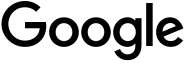
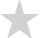
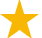
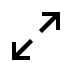

In [342]:
webpage

In [343]:
soup=BeautifulSoup(webpage,'lxml')

In [349]:
soup.find('span',class_='LrzXr zdqRlf kno-fv').text

'011 4144 7451'